In [1]:
#Import important libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('malignant_train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
print("Features/Columns :\n", df.columns)

Features/Columns :
 Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')


In [5]:
#checking shape of train dataset
print ('Shape =',df.shape)

Shape = (159571, 8)


In [6]:
#checking datatype of each feature
print("Data Types :\n", df.dtypes)

Data Types :
 id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


In [7]:
#checking NAN value
print("Contains NaN/Empty cells : ", df.isnull().values.any())

Contains NaN/Empty cells :  False


<AxesSubplot:>

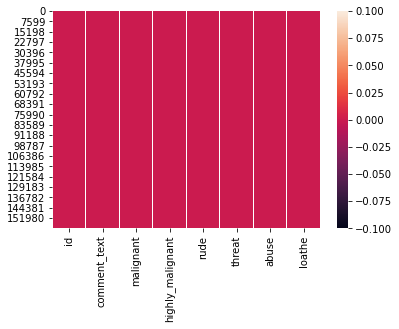

In [8]:
sns.heatmap(df.isnull())

In [9]:
# Checking value counts for each feature..
cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print("Number of value_counts of {} : {}".format(col, df[col].nunique()))
    print(df[col].value_counts())

Number of value_counts of malignant : 2
0    144277
1     15294
Name: malignant, dtype: int64
Number of value_counts of highly_malignant : 2
0    157976
1      1595
Name: highly_malignant, dtype: int64
Number of value_counts of rude : 2
0    151122
1      8449
Name: rude, dtype: int64
Number of value_counts of threat : 2
0    159093
1       478
Name: threat, dtype: int64
Number of value_counts of abuse : 2
0    151694
1      7877
Name: abuse, dtype: int64
Number of value_counts of loathe : 2
0    158166
1      1405
Name: loathe, dtype: int64


In [10]:
# Dropping 'id' as it it not of much importance
df.drop(['id'],axis=1,inplace=True)

In [11]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Let's have a look at the count plots of individual Categories.
label=df.columns[1:]
label

Index(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')

************* malignant comments************


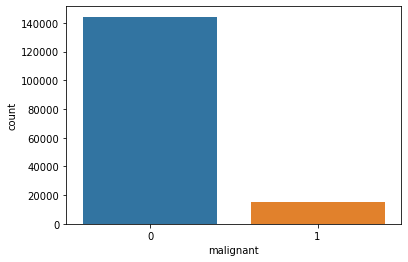

-----------------------------------------------------------------------------------------
************* highly_malignant comments************


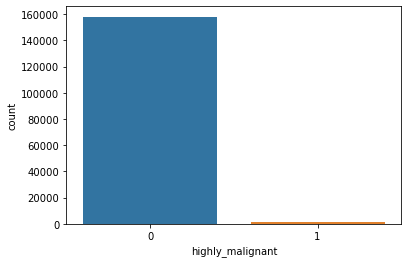

-----------------------------------------------------------------------------------------
************* rude comments************


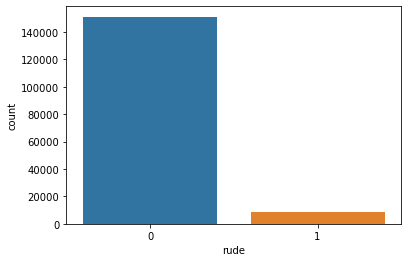

-----------------------------------------------------------------------------------------
************* threat comments************


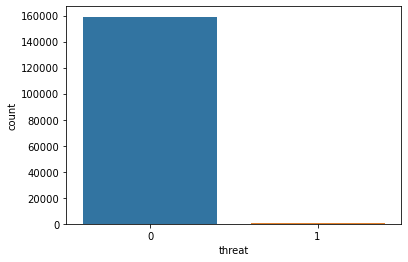

-----------------------------------------------------------------------------------------
************* abuse comments************


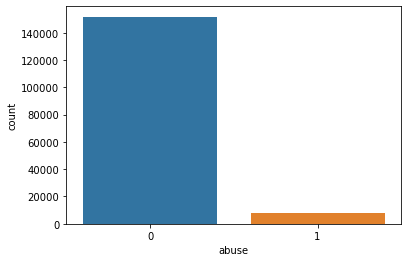

-----------------------------------------------------------------------------------------
************* loathe comments************


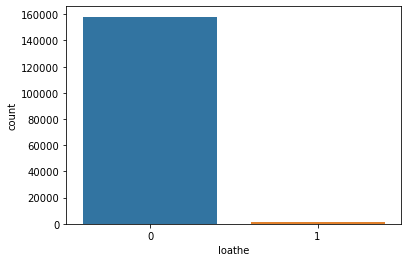

-----------------------------------------------------------------------------------------


In [13]:
for i in label:
    print('*************' ,i,'comments************')
   
    sns.countplot(df[i])
    plt.show()
    print('-----------------------------------------------------------------------------------------')

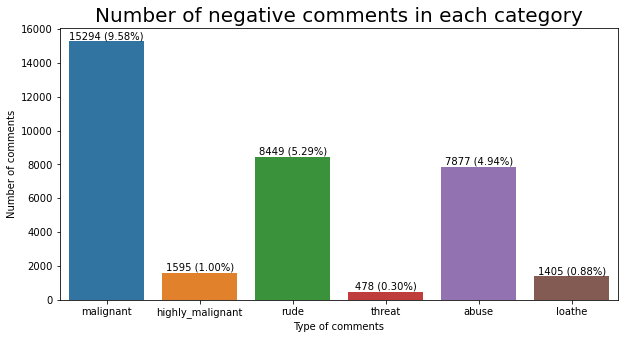

In [14]:
plt.figure(figsize=(10,5))
values=df.iloc[:,1:].sum().values
ax=sns.barplot(x=df.columns[1:],y=values)
plt.title('Number of negative comments in each category',fontsize=20)
plt.xlabel('Type of comments')
plt.ylabel('Number of comments')
for patch,patch_value in zip(ax.patches,values):
    ax.text(x=patch.get_x()+patch.get_width()/2, y= patch.get_height()+5 ,s= '{} ({:.2f}%)'.format(patch_value,(patch_value/159571)*100), ha='center' ,va ='bottom')


In [15]:
#Checking percentage of good and bad comments in dataset
good_comments = df[(df['malignant']!=1) & (df['highly_malignant']!=1) & (df['rude']!=1) & 
                            (df['threat']!=1) & (df['abuse']!=1) & (df['loathe']!=1)]
good_percent=len(good_comments)/len(df)*100
print('Percentage of good comments = ',good_percent)
print('Percentage of negative comments = ', (100-good_percent))

Percentage of good comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


In [16]:
df['label_sum']=df.iloc[:,1]+df.iloc[:,2]+df.iloc[:,3]+df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]


0    89.832112
1     3.985687
3     2.637697
2     2.180847
4     1.102957
5     0.241272
6     0.019427
Name: label_sum, dtype: float64

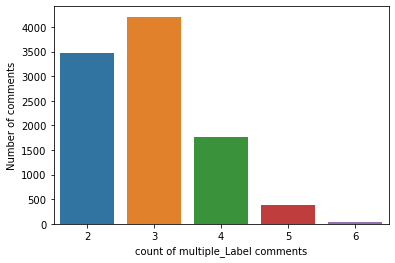

In [17]:
sns.countplot(x='label_sum',data=df[df['label_sum']>1])
plt.xlabel('count of multiple_Label comments', fontsize=10)
plt.ylabel('Number of comments',fontsize=10)
df['label_sum'].value_counts()/159571*100

In [18]:
# Adding new column comment_length to check length of comment_text characters

df['comment_length']=df.comment_text.str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label_sum,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


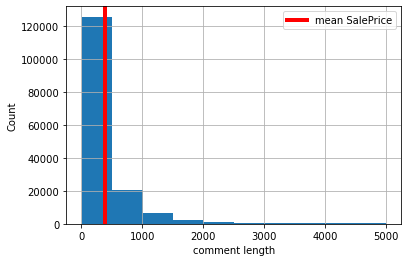

394.138847284281


In [19]:
#checking the average comment length
comment_length=df['comment_length'].hist()
mean_val=np.mean(df['comment_length'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean SalePrice')
plt.xlabel('comment length')
plt.ylabel('Count')
plt.legend()

plt.show()
print(df['comment_length'].mean(),)

In [20]:
# Convert all comments to lower case
df['comment_text'] = df['comment_text'].str.lower()

    # Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text']=df['comment_text'].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text']=df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
#df['comment_text']=df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

#replace prople with pepl
#df['comment_text']=df['comment_text'].str.replace(r'[p.]ple', 'pepl')

#replace prople with pepl
#df['comment_text']=df['comment_text'].str.replace(r'[p.]ase', 'plz')

#[rp.]ain

    # Remove punctuation
#df['comment_text']=df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
df['comment_text']=df['comment_text'].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
df['comment_text']=df['comment_text'].str.replace(r'^\s+|\s+?$', '')
    
    #REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['comment_text']=df['comment_text'].str.replace(r"[^a-zA-Z0-9]+", " ")
    
     #REPLACING one or 2  character length word   BY WHITE SPACE 
df['comment_text']=df['comment_text'].str.replace(r'\b[a-zA-Z]{1,2}\b', '')

In [21]:
#replace prople with pepl
#df['comment_text']=df['comment_text'].str.replace('people', 'pepl')

#replace prople with pepl
#df['comment_text']=df['comment_text'].str.replace('please', 'plz')

In [22]:
import string
punct=string.punctuation

In [23]:

# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['comment_text']=df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

df['comment_text']=df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))



In [24]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['comment_text'] = df['comment_text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [25]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label_sum,comment_length
0,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0,0,264
1,"[aww, matches, background, colour, seemingly, ...",0,0,0,0,0,0,0,112
2,"[hey, man, really, trying, edit, war, guy, con...",0,0,0,0,0,0,0,233
3,"[make, real, suggestions, improvement, wondere...",0,0,0,0,0,0,0,622
4,"[sir, hero, chance, remember, page]",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,"[second, time, asking, view, completely, contr...",0,0,0,0,0,0,0,295
159567,"[ashamed, horrible, thing, put, talk, page, 12...",0,0,0,0,0,0,0,99
159568,"[spitzer, umm, theres, actual, article, prosti...",0,0,0,0,0,0,0,81
159569,"[looks, like, actually, put, speedy, first, ve...",0,0,0,0,0,0,0,116


In [26]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [27]:
# Processing Headline with above Function
processed_comment = []

for doc in df.comment_text:
    processed_comment.append(preprocess(doc))
    
print(len(processed_comment))
processed_comment[:3]

159571


[['explan',
  'edit',
  'make',
  'usernam',
  'hardcor',
  'metallica',
  'fan',
  'revert',
  'vandal',
  'closur',
  'gas',
  'vote',
  'new',
  'york',
  'doll',
  'fac',
  'pleas',
  'remov',
  'templat',
  'talk',
  'page',
  'sinc',
  'retir',
  '205'],
 ['aww',
  'match',
  'background',
  'colour',
  'seem',
  'stick',
  'thank',
  'talk',
  'januari',
  '2016',
  'utc'],
 ['hey',
  'man',
  'realli',
  'tri',
  'edit',
  'war',
  'guy',
  'constant',
  'remov',
  'relev',
  'inform',
  'talk',
  'edit',
  'instead',
  'talk',
  'page',
  'seem',
  'care',
  'format',
  'actual',
  'info']]

In [28]:
df['clean_comment']=processed_comment

In [29]:

df['comment_text'] = df['clean_comment'].apply(lambda x:' '.join(y for y in x))

In [30]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label_sum,comment_length,clean_comment
0,explan edit make usernam hardcor metallica fan...,0,0,0,0,0,0,0,264,"[explan, edit, make, usernam, hardcor, metalli..."
1,aww match background colour seem stick thank t...,0,0,0,0,0,0,0,112,"[aww, match, background, colour, seem, stick, ..."
2,hey man realli tri edit war guy constant remov...,0,0,0,0,0,0,0,233,"[hey, man, realli, tri, edit, war, guy, consta..."
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,0,622,"[make, real, suggest, improv, wonder, section,..."
4,sir hero chanc rememb page,0,0,0,0,0,0,0,67,"[sir, hero, chanc, rememb, page]"


In [31]:
# Creating a new feature having Negative Comments and Non-Negative Comments.
df['comment_label'] = df[label].max(axis=1)
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label_sum,comment_length,clean_comment,comment_label
0,explan edit make usernam hardcor metallica fan...,0,0,0,0,0,0,0,264,"[explan, edit, make, usernam, hardcor, metalli...",0
1,aww match background colour seem stick thank t...,0,0,0,0,0,0,0,112,"[aww, match, background, colour, seem, stick, ...",0
2,hey man realli tri edit war guy constant remov...,0,0,0,0,0,0,0,233,"[hey, man, realli, tri, edit, war, guy, consta...",0
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,0,622,"[make, real, suggest, improv, wonder, section,...",0
4,sir hero chanc rememb page,0,0,0,0,0,0,0,67,"[sir, hero, chanc, rememb, page]",0


In [32]:
df['comment_clean_length']=df.comment_text.str.len()


In [33]:

print ('Origian subject Length', df.comment_length.sum())
print ('Clean subject Length', df.comment_clean_length.sum())

Origian subject Length 62893130
Clean subject Length 34569034


In [34]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label_sum,comment_length,clean_comment,comment_label,comment_clean_length
0,explan edit make usernam hardcor metallica fan...,0,0,0,0,0,0,0,264,"[explan, edit, make, usernam, hardcor, metalli...",0,139
1,aww match background colour seem stick thank t...,0,0,0,0,0,0,0,112,"[aww, match, background, colour, seem, stick, ...",0,66
2,hey man realli tri edit war guy constant remov...,0,0,0,0,0,0,0,233,"[hey, man, realli, tri, edit, war, guy, consta...",0,116
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,0,622,"[make, real, suggest, improv, wonder, section,...",0,304
4,sir hero chanc rememb page,0,0,0,0,0,0,0,67,"[sir, hero, chanc, rememb, page]",0,26


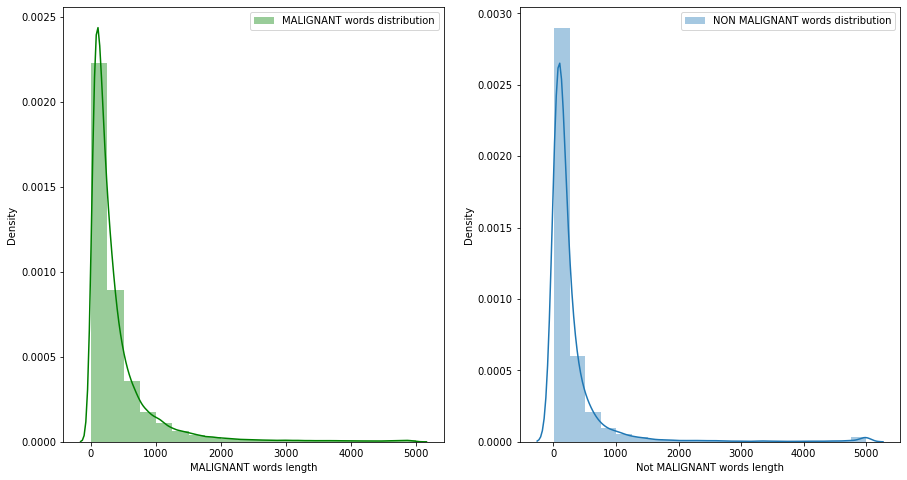

In [35]:
# Comments length distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['comment_label']==0]['comment_length'],bins=20,ax=ax[0],label='MALIGNANT words distribution',color='g')

ax[0].set_xlabel('MALIGNANT words length')
ax[0].legend()

sns.distplot(df[df['comment_label']==1]['comment_length'],bins=20,ax=ax[1],label='NON MALIGNANT words distribution')
ax[1].set_xlabel('Not MALIGNANT words length')
ax[1].legend()

plt.show()

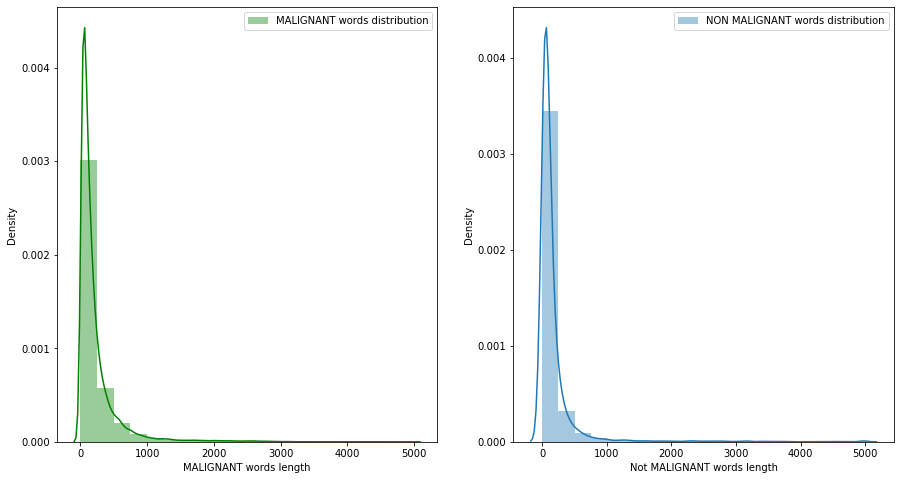

In [36]:
# Comments length distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['comment_label']==0]['comment_clean_length'],bins=20,ax=ax[0],label='MALIGNANT words distribution',color='g')

ax[0].set_xlabel('MALIGNANT words length')
ax[0].legend()

sns.distplot(df[df['comment_label']==1]['comment_clean_length'],bins=20,ax=ax[1],label='NON MALIGNANT words distribution')
ax[1].set_xlabel('Not MALIGNANT words length')
ax[1].legend()

plt.show()

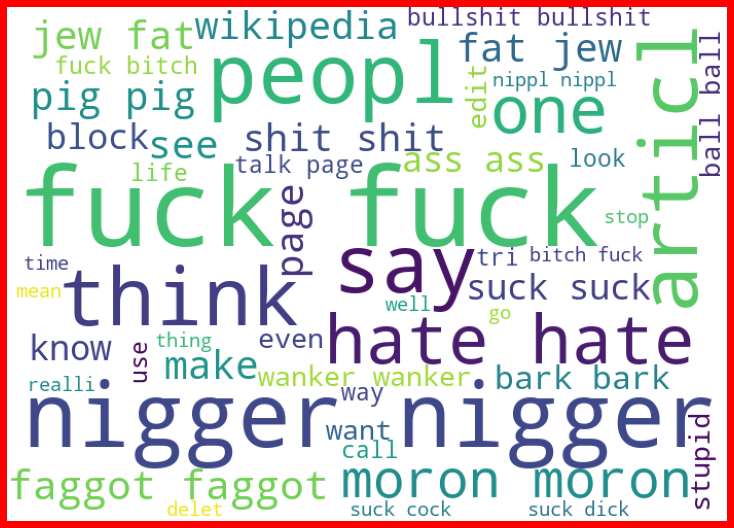

In [37]:
#Getting sense of loud words in negative comment
from wordcloud import WordCloud

spams = df['comment_text'][df['comment_label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


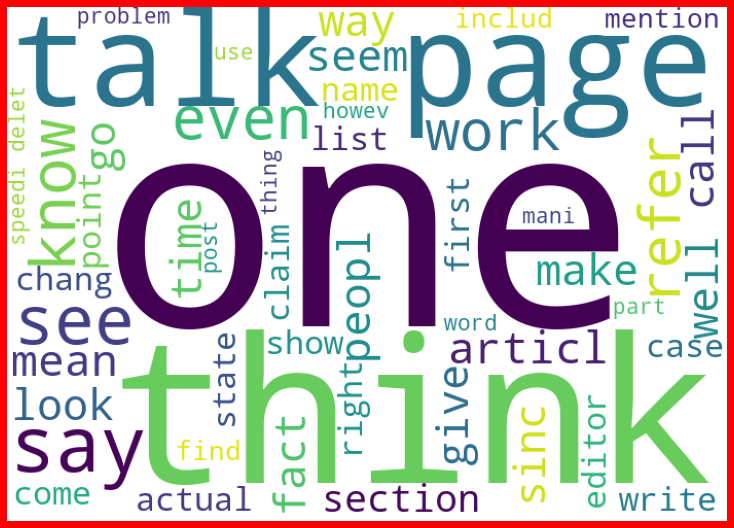

In [38]:
#Getting sense of loud words in neutral/positive comment
from wordcloud import WordCloud

spams = df['comment_text'][df['comment_label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [39]:
from collections import Counter
#for counting frequently occurence of Negative and Non negative words.
count1 = Counter(" ".join(df[df['comment_label']==1]["comment_text"]).split()).most_common(50)
count2 = Counter(" ".join(df[df['comment_label']==0]["comment_text"]).split()).most_common(50)
dataframe=pd.DataFrame()
print("TOP 50 Words in Each Category (Word,Counts)")
dataframe['Most Frequent Words in Negative Comments']=count1
dataframe['Most Frequent Words in Non negative Comments']=count2
dataframe

TOP 50 Words in Each Category (Word,Counts)


,Most Frequent Words in Negative Comments,Most Frequent Words in Non negative Comments
0,"(fuck, 13572)","(articl, 72409)"
1,"(suck, 4824)","(page, 54400)"
2,"(like, 4009)","(wikipedia, 44778)"
3,"(wikipedia, 3941)","(edit, 39073)"
4,"(shit, 3727)","(talk, 38477)"
5,"(nigger, 3436)","(use, 34111)"
6,"(get, 3396)","(one, 28966)"
7,"(ass, 3044)","(pleas, 28921)"
8,"(page, 2871)","(make, 28314)"
9,"(faggot, 2709)","(would, 28158)"


In [43]:
# Convert text into vectors using TF-IDF
# Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [44]:
# TF-IDF(term frequency–inverse document frequency) vectorizer
def Tf_idf(text):
    tfid = TfidfVectorizer(min_df=2,smooth_idf=False)
    return tfid.fit_transform(text)



In [45]:
# Let's define x, y for modelling
x=Tf_idf(df['comment_text'])
x.shape

(159571, 54484)

In [46]:
y = df['comment_label']
y.shape

(159571,)

In [47]:
# Train_train_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42,stratify=y)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,log_loss
from sklearn.model_selection import cross_val_score

In [50]:
KNN=KNeighborsClassifier()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF= RandomForestClassifier()
AD= AdaBoostClassifier()
MNB = MultinomialNB()

In [51]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('MultinomialNB',MNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier()



Accuracy score = 0.9085303186022611


cross validation score = 0.9082916082522601


Log loss :  3.159261235226744
roc_auc_score =  0.6066921100518735


classification_report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     35837
           1       0.64      0.23      0.34      4056

    accuracy                           0.91     39893
   macro avg       0.78      0.61      0.64     39893
weighted avg       0.89      0.91      0.89     39893



[[35320   517]
 [ 3132   924]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression()



Accuracy score = 0.9564835936129146


cross validation score = 0.9570535927631617


Log loss :  1.5030073382062985
roc_auc_score =  0.8073138649250092


classification_report
               precision    recall  f1-score  

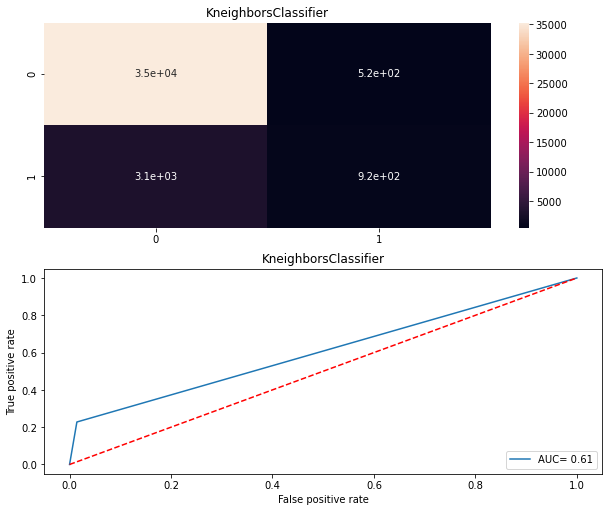

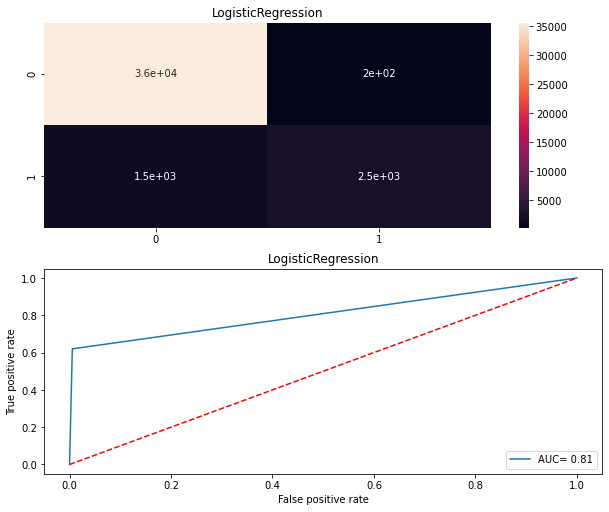

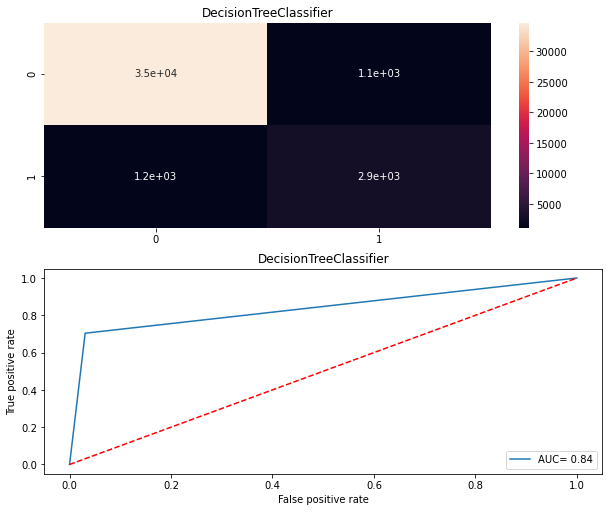

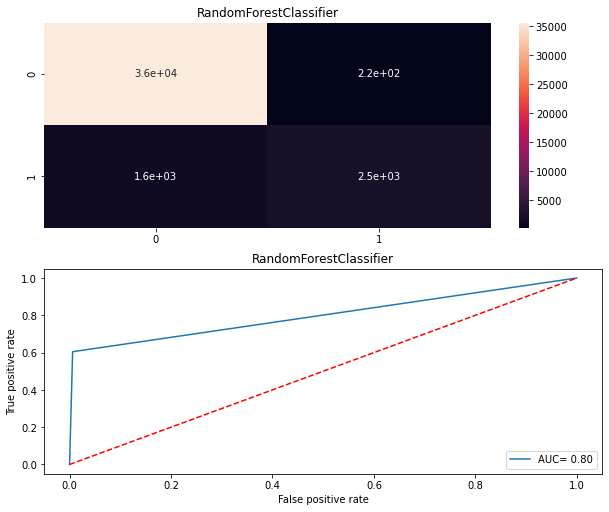

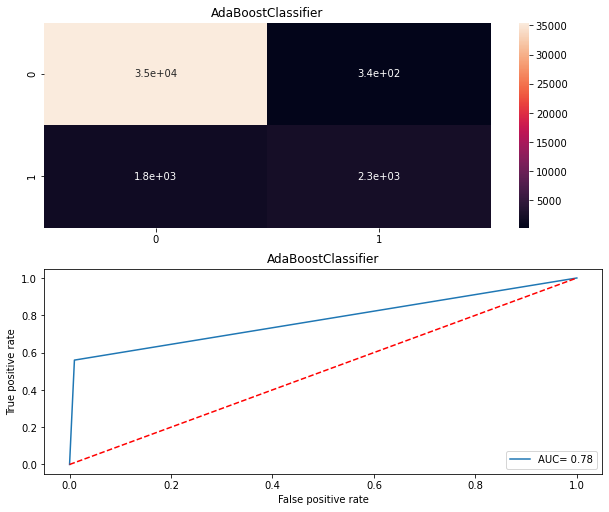

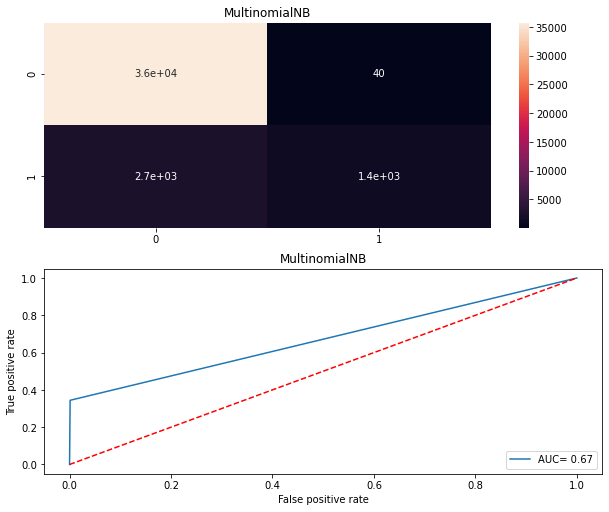

In [52]:
model_list=[]
score=[]
cvs=[]
rocscore=[]
logloss=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    loss = log_loss(y_test,pre)
    print('Log loss : ', loss)
    logloss.append(loss)
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [57]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore,'Log_Loss':logloss})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score,Log_Loss
0,KneighborsClassifier,90.853032,90.829161,60.669211,3.159261
1,LogisticRegression,95.648359,95.705359,80.731386,1.503007
2,DecisionTreeClassifier,94.229564,94.239556,83.658651,1.993060
3,RandomForestClassifier,95.437796,95.477875,79.936392,1.575734
4,AdaBoostClassifier,94.663224,94.728992,77.504679,1.843264
5,MultinomialNB,93.231895,93.408577,67.153265,2.337621


##### We choose Logistic Regression model as the final one,as it gives hightest accuracy score & also log_loss value is minimum which indicates better prediction

In [60]:
max_accuracy_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20,stratify=y)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    LR_pred=LR.predict(x_test)
    accuracy_scr=accuracy_score(y_test,LR_pred)
    if accuracy_scr>max_accuracy_score:
        max_accuracy_score=accuracy_scr
        final_r_state=r_state
        
print('max accuracy score corresponding to ',final_r_state,'is',max_accuracy_score)

max accuracy score corresponding to  96 is 0.958890803697321


In [61]:
LR=LogisticRegression(random_state=96)
LR.fit(x_train,y_train)
predlg=LR.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
print('Log loss : ', log_loss(y_test,predlg))

accuracy_score: 0.955851480495065
[[28500   170]
 [ 1239  2006]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28670
           1       0.92      0.62      0.74      3245

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.95      0.96      0.95     31915

Log loss :  1.5248401025220841


###### saving logistic regression model as the best model

In [62]:
#Saving the best model

import joblib

joblib.dump(LR,'malignant_comment.pkl')

['malignant_comment.pkl']

##### loading the test dataset

In [64]:
df_test=pd.read_csv('malignant_test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [65]:
# adding new column & checking length
df_test['comment_length'] = df_test['comment_text'].apply(lambda x: len(str(x)))
df_test.head()

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41


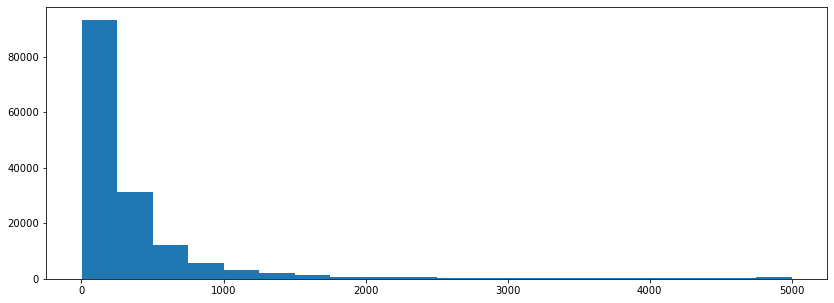

In [67]:
plt.figure(figsize=(14,5))
plt.hist(df_test['comment_length'],bins=20)
plt.show()

Similar to the train data set, here also the maximum character lengths are between 0-250, then the frequency reduces as the number of characters increase

In [68]:
# Convert all comments to lower case
df_test['comment_text'] = df_test['comment_text'].str.lower()

    # Replace email addresses with 'email'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_test['comment_text']=df_test['comment_text'].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test['comment_text']=df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
#df['comment_text']=df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

#replace prople with pepl
#df['comment_text']=df['comment_text'].str.replace(r'[p.]ple', 'pepl')

#replace prople with pepl
#df['comment_text']=df['comment_text'].str.replace(r'[p.]ase', 'plz')

#[rp.]ain

    # Remove punctuation
#df['comment_text']=df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
df_test['comment_text']=df_test['comment_text'].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
df_test['comment_text']=df_test['comment_text'].str.replace(r'^\s+|\s+?$', '')
    
    #REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df_test['comment_text']=df_test['comment_text'].str.replace(r"[^a-zA-Z0-9]+", " ")
    
     #REPLACING one or 2  character length word   BY WHITE SPACE 
df_test['comment_text']=df_test['comment_text'].str.replace(r'\b[a-zA-Z]{1,2}\b', '')

In [69]:

# Remove stopwords & punctuation

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_test['comment_text']=df_test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

df_test['comment_text']=df_test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))



In [70]:
tokenizer=RegexpTokenizer(r'\w+')
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [71]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [72]:
# Processing Headline with above Function
processed_comment = []

for doc in df_test.comment_text:
    processed_comment.append(preprocess(doc))
    
print(len(processed_comment))
processed_comment[:3]

153164


[['bitch',
  'rule',
  'succes',
  'ever',
  'what',
  'hat',
  'sad',
  'mofucka',
  'bitch',
  'slap',
  'pethed',
  'white',
  'face',
  'get',
  'kiss',
  'ass',
  'guy',
  'sicken',
  'rule',
  'pride',
  'music',
  'man',
  'diss',
  'shit',
  'nothin',
  'wrong',
  'bein',
  'like',
  'tupac',
  'brother',
  'fuckin',
  'white',
  'boy',
  'get',
  'thing',
  'right',
  'next',
  'time'],
 ['rfc', 'titl', 'fine', 'imo'],
 ['sourc', 'zaw', 'ashton', 'lapland']]

In [75]:
df_test['clean_comment']=processed_comment
df_test['comment_text'] = df_test['clean_comment'].apply(lambda x:' '.join(y for y in x))

In [76]:
df_test['comment_clean_length']=df_test.comment_text.str.len()

print ('Origian subject Length', df_test.comment_length.sum())
print ('Clean subject Length', df_test.comment_clean_length.sum())

Origian subject Length 55885733
Clean subject Length 30369511


In [78]:
df_test.head()

,id,comment_text,comment_length,clean_comment,comment_clean_length
0,00001cee341fdb12,bitch rule succes ever what hat sad mofucka bi...,367,"[bitch, rule, succes, ever, what, hat, sad, mo...",207
1,0000247867823ef7,rfc titl fine imo,50,"[rfc, titl, fine, imo]",17
2,00013b17ad220c46,sourc zaw ashton lapland,54,"[sourc, zaw, ashton, lapland]",24
3,00017563c3f7919a,look back sourc inform updat correct form gues...,205,"[look, back, sourc, inform, updat, correct, fo...",91
4,00017695ad8997eb,anonym edit articl,41,"[anonym, edit, articl]",18


In [82]:
# TF-IDF(term frequency–inverse document frequency) vectorizer
def Tf_idf(text):
    tfid = TfidfVectorizer(min_df=2,max_features=54484,smooth_idf=False)
    return tfid.fit_transform(text)

# Let's define x, y for modelling
x=Tf_idf(df_test['comment_text'])
x.shape

(153164, 54484)

In [83]:
Prediction=LR.predict(x)
df_test['Predicted values']=Prediction
df_test

,id,comment_text,comment_length,clean_comment,comment_clean_length,Predicted values
0,00001cee341fdb12,bitch rule succes ever what hat sad mofucka bi...,367,"[bitch, rule, succes, ever, what, hat, sad, mo...",207,0
1,0000247867823ef7,rfc titl fine imo,50,"[rfc, titl, fine, imo]",17,0
2,00013b17ad220c46,sourc zaw ashton lapland,54,"[sourc, zaw, ashton, lapland]",24,0
3,00017563c3f7919a,look back sourc inform updat correct form gues...,205,"[look, back, sourc, inform, updat, correct, fo...",91,0
4,00017695ad8997eb,anonym edit articl,41,"[anonym, edit, articl]",18,0
...,...,...,...,...,...,...
153159,fffcd0960ee309b5,total agre stuff noth long crap,60,"[total, agre, stuff, noth, long, crap]",31,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throw cut ma...,198,"[throw, field, home, plate, get, faster, throw...",103,0
153161,fffda9e8d6fafa9e,okinotorishima categori see chang agre correct...,423,"[okinotorishima, categori, see, chang, agre, c...",211,0
153162,fffe8f1340a79fc2,one found nation germani law return quit simil...,502,"[one, found, nation, germani, law, return, qui...",298,0


In [84]:
df_test['Predicted values'].value_counts()

0    152484
1       680
Name: Predicted values, dtype: int64

In [85]:
df_test.to_csv('Malignant_comment_Predict.csv')

In [86]:
# Pickle file.
import joblib
joblib.dump(LR,'Malignant_comment_Predict.pkl')

['Malignant_comment_Predict.pkl']